**<font color = black size=6>实验八:降维</font>**

本次实验为编写机器学习中的用于降维的PCA(主成分分析)算法。在本次实验中，我们将对一个维度过高的数据集进行降维。

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from pandas.core.frame import DataFrame

**<font color = blue size=4>第一部分:函数介绍</font>**

介绍一些可以用到的函数

1.计算方阵的特征值和特征向量

In [147]:
a=np.array([[1,0,0],[0,2,0],[0,0,3]])
vals,vecs=np.linalg.eig(a)
print("该矩阵的特征值:",vals)
print("该矩阵的特征向量:",vecs)

该矩阵的特征值: [1. 2. 3.]
该矩阵的特征向量: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2.排序函数

In [148]:
#list的排序
a=[3,1,2,4]
a.sort()
print(a)
#字典的排序
a=[3,1,2,4]
b=[[0,0,3,0],[1,0,0,0],[0,2,0,0],[0,0,0,4]]
c = [(a[i],b[i]) for i in range(len(a))]
print("未排序前:",c)
c=sorted(c)
print("排序后:",c)

[1, 2, 3, 4]
未排序前: [(3, [0, 0, 3, 0]), (1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (4, [0, 0, 0, 4])]
排序后: [(1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (3, [0, 0, 3, 0]), (4, [0, 0, 0, 4])]


**<font color = blue size=4>第二部分:实验任务</font>**

本任务使用train_data.csv数据集，共有九维特征.本次实验实现PCA算法，下面是PCA算法的伪代码

In [149]:
%%html
<img src="PCA Pseudocode.png", width=720, heigth=240>

**<font color = green size=3>1):降维</font>**

<span style="color:purple">1.将训练集"train_data.csv"导入，训练集共有167个样本，每个样本有9个特征值，将原始数据按列组成9行167列的矩阵X</span>

In [150]:
# 读取数据集
train_data = pd.read_csv("train_data.csv")
X = train_data.values.T
print(X)

[[9.02e+01 1.66e+01 2.73e+01 ... 2.33e+01 5.63e+01 8.31e+01]
 [1.00e+01 2.80e+01 3.84e+01 ... 7.20e+01 3.00e+01 3.70e+01]
 [7.58e+00 6.55e+00 4.17e+00 ... 6.84e+00 5.18e+00 5.89e+00]
 ...
 [5.62e+01 7.63e+01 7.65e+01 ... 7.31e+01 6.75e+01 5.20e+01]
 [5.82e+00 1.65e+00 2.89e+00 ... 1.95e+00 4.67e+00 5.40e+00]
 [5.53e+02 4.09e+03 4.46e+03 ... 1.31e+03 1.31e+03 1.46e+03]]


<span style="color:purple">2.对所有样本进行中心化，即将X的每一行减去这一行的均值</span>

In [151]:
# 计算与存储平均值
X_means = np.mean(X, axis=1, keepdims=True)
X_centered = X - X_means


<span style="color:purple">3.求出协方差矩阵
$X$.$X^T$</span>

In [152]:
# 求取协方差矩阵
cov_matrix = np.cov(X_centered)


<span style="color:purple">4.对协方差矩阵
$X$.$X^T$
做特征值分解，即求出协方差矩阵的特征值
$\vec{\lambda}=\{\lambda_1,\lambda_2,...,\lambda_d\}$
及对应的特征向量
$\vec{\omega}=\{\omega_1,\omega_2,...,\omega_d\}$
. 其中
$\lambda_i \sim \omega_i$
.</span>

In [153]:
#your code here
# 求特征值与特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 字典类型
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]

# 排序
eigenpairs = sorted(eigenpairs, reverse=True)


<span style="color:purple">5.选取降维后的维度k：依据特征值计算方差的贡献率，先将所有特征值按照降序进行排序。要求降维后的数据方差占比超过阈值t%，公式如下. 我们这里取阈值为t%=99%:
    $$\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^k\lambda_i} \geq t\%$$
</span>

In [154]:
# 选择降维后的维度k
total_v = sum(eigenvalues)
v_ratio = [(i / total_v) for i in [eigenpair[0] for eigenpair in eigenpairs[:]]]
cumulative_v = np.cumsum(v_ratio)

# 设置阈值, 这里为99%
threshold = 0.99
k = np.argmax(cumulative_v >= threshold) + 1


<span style="color:purple">6.将特征向量按对应特征值大小从上到下按行排列，取前k个对应特征值最大的特征向量组成投影矩阵
W=($\omega_1,\omega_2,...,\omega_k$)</span>

In [155]:
# 组成投影矩阵
top_k_eigenvectors = np.array([eigenpair[1] for eigenpair in eigenpairs[:k]])
W = top_k_eigenvectors


<span style="color:purple">7.根据公式
$Y=W·X$
得到降维到k维后的数据集Y。

In [156]:
# 得到降维到k维后的数据集Y
Y = np.dot(W, X_centered)


<span style="color:purple">8.请从降维的特征值选择其中两个（如果降维后不足二维，则跳过这部分）作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

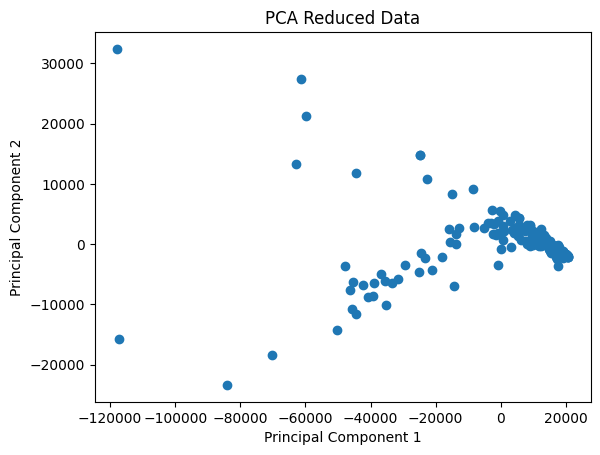

In [157]:
if k >= 2:
    plt.scatter(Y[0], Y[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Reduced Data')
    plt.show()

**<font color = blue size=4>第三部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、本次实验报告下周（11.10 14:20）交  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验八(降维)的实验报告:  
截止时间：2023-11-10 14:20  
提交地址：https://send2me.cn/U83-fI9G/T5Svof7YxaL6Ng

三、课堂课件获取地址:https://www.jianguoyun.com/p/Dag8kS8Qp5WhChjW06UFIAA  
实验内容获取地址:https://www.jianguoyun.com/p/Db5AxlgQp5WhChjY06UFIAA